In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Employee%20Turnover/turnover.csv',encoding='ISO-8859-1')

df = pd.DataFrame(file)
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [6]:
df.isnull().any()

stag            False
event           False
gender          False
age             False
industry        False
profession      False
traffic         False
coach           False
head_gender     False
greywage        False
way             False
extraversion    False
independ        False
selfcontrol     False
anxiety         False
novator         False
dtype: bool

In [7]:
df_objects = df.select_dtypes(include=['object']).copy() # La guardamos como variable para su posterior uso.
print(df_objects.columns.values,'\n')

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way'] 



In [8]:
for i in df_objects.columns.values:
    print(i,':', df[i].unique(),'\n')

gender : ['m' 'f'] 

industry : ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate'] 

profession : ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting'] 

traffic : ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends'] 

coach : ['no' 'yes' 'my head'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 



In [9]:
df_numerical = df.select_dtypes(exclude=['object']).copy()
print(df_numerical.columns.values,'\n')

['stag' 'event' 'age' 'extraversion' 'independ' 'selfcontrol' 'anxiety'
 'novator'] 



In [10]:
event = df['event'].value_counts()
porcentaje = [round(i*100/event.sum(),1) for i in df['event'].value_counts()]
print(event,'\n')
print('Trabajadores que renuncian : %',porcentaje[0])
print('Trabajadores que se quendan : %',porcentaje[1])

1    571
0    558
Name: event, dtype: int64 

Trabajadores que renuncian : % 50.6
Trabajadores que se quendan : % 49.4


In [11]:
df.groupby('event').mean()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
event,,,,,,,
0,38.294819,31.411829,5.563441,5.388710,5.677419,5.774910,5.866487
1,34.998191,30.729952,5.620665,5.565324,5.518914,5.558844,5.892469


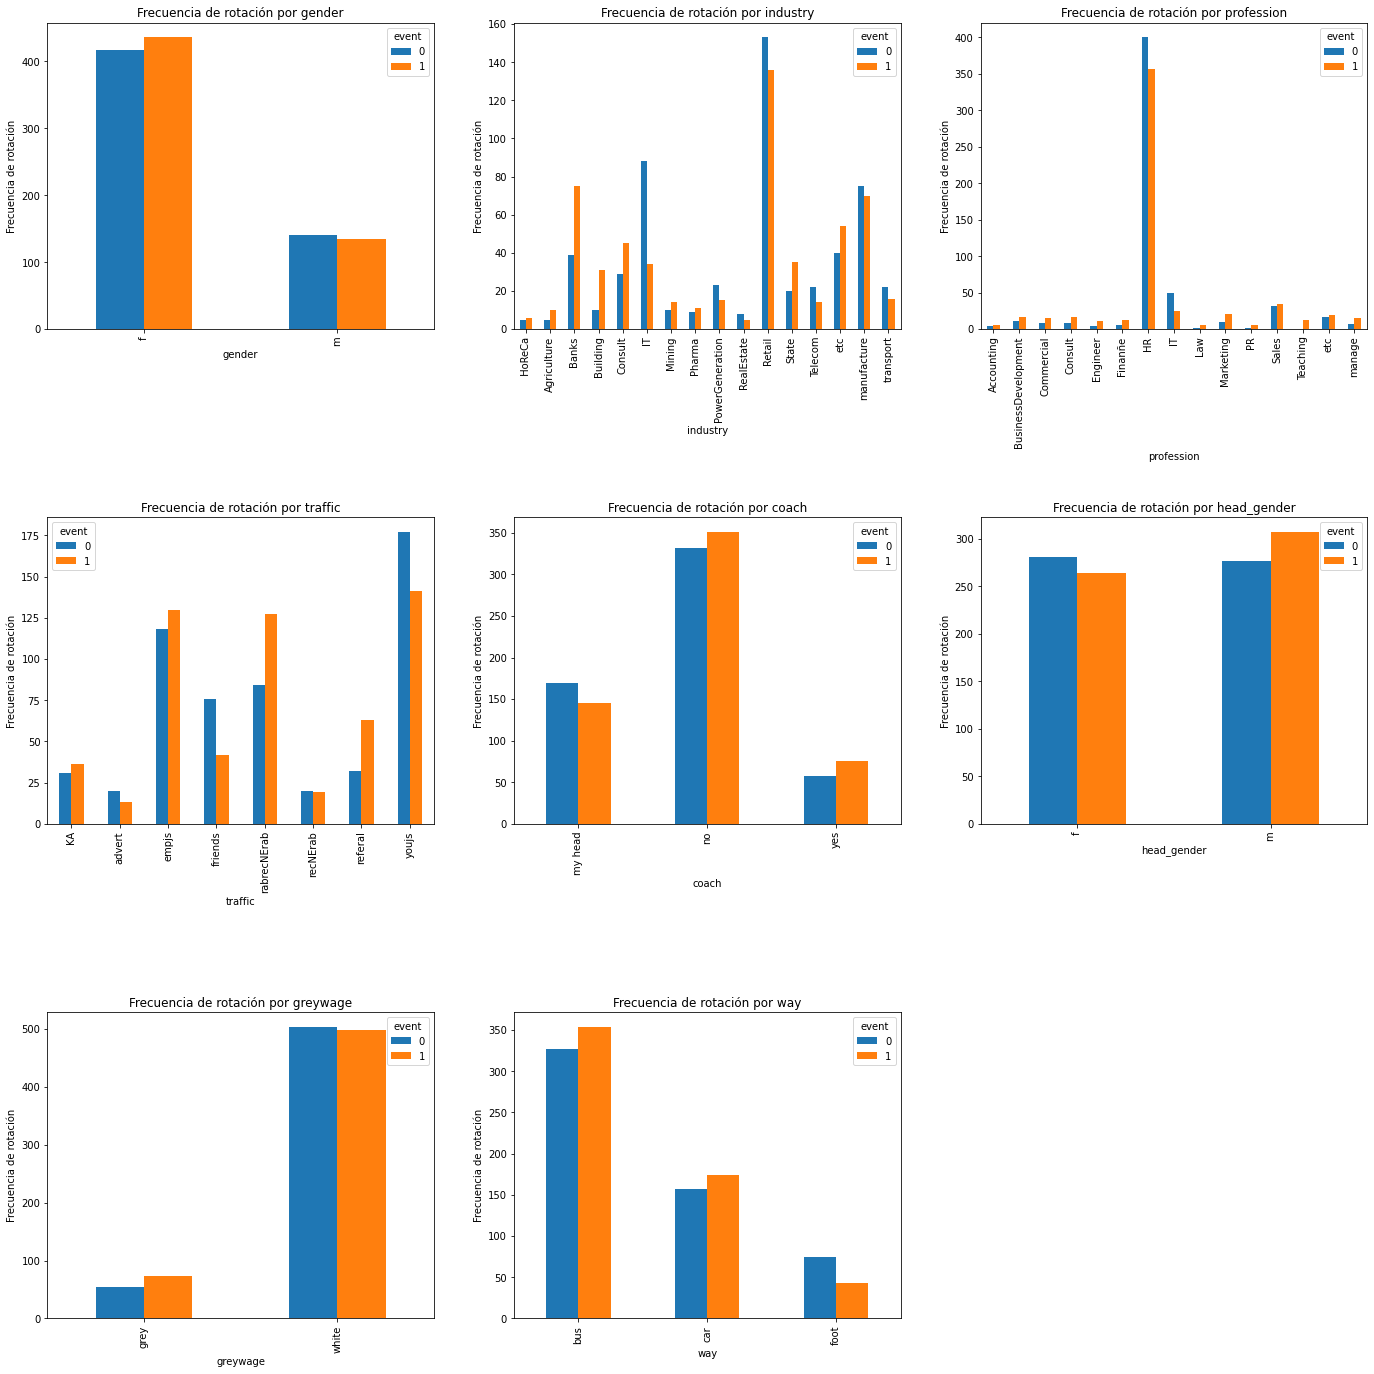

In [12]:
rows    = 3
columns = 3
c       = 1
fig = plt.figure(figsize=(20,20))
for i in df_objects.columns.values:

    ax = plt.subplot(rows,columns,c)
    pd.crosstab(df[i],df.event).plot(kind='bar',ax=ax)
    plt.title('Frecuencia de rotación por {}'.format(i))
    plt.ylabel('Frecuencia de rotación')
    plt.xlabel('{}'.format(i))
    plt.tight_layout(pad=4.0)
    c = c + 1

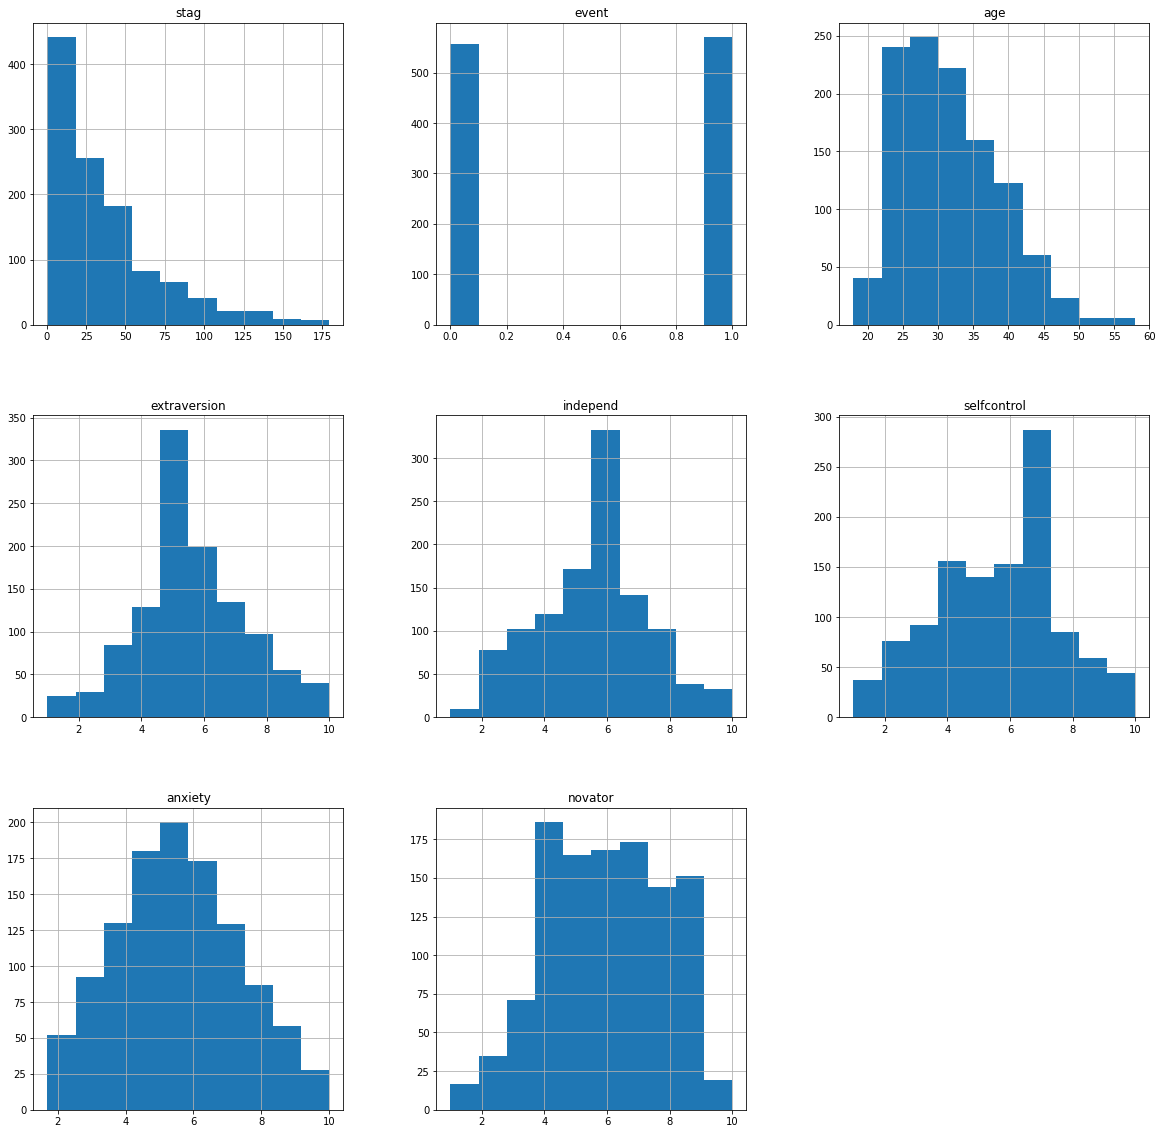

In [13]:
num_bins = 10
histograma = df.hist(bins=num_bins, figsize=(20,20))

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [15]:
for i in df_objects.columns.values:
    object_list = 'var'+' '+ i
    object_list = pd.get_dummies(df[i],prefix = i)
    df_1 = df.join(object_list)
    df = df_1
df = df.drop(df_objects,axis=1)

In [16]:
df_1 = df.drop('event', axis=1)  
X = df_1.values                  
Y = df['event'].values           

In [17]:
scaler = preprocessing.StandardScaler()
X2 = scaler.fit_transform(X)   

In [18]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator= rfc, step= 1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X2,Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

Número óptimo de features: 42


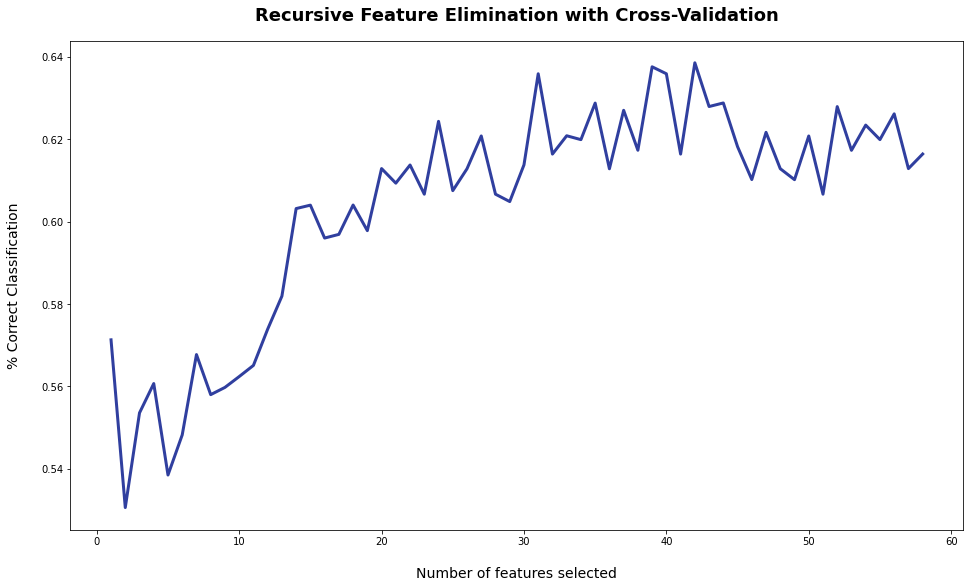

In [19]:
print('Número óptimo de features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [20]:
df_2 = df_1 
df_2.drop(df_2.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

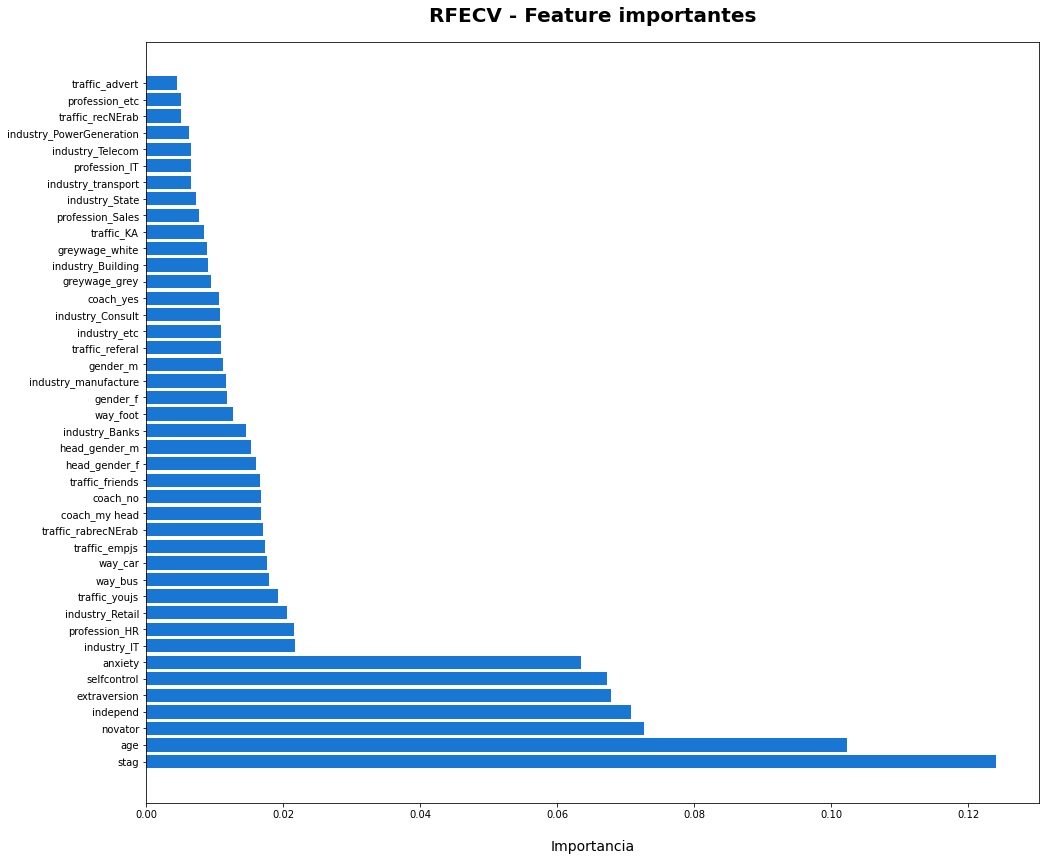

In [21]:
dset = pd.DataFrame()
dset['attr'] = df_2.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importantes', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importancia', fontsize=14, labelpad=20)
plt.show()

In [22]:
test_size = 0.3
random_state = 42

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size= test_size, random_state= random_state)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (790, 58)
Training Labels Shape: (790,)
Testing Features Shape: (339, 58)
Testing Labels Shape: (339,)


In [23]:
model_logreg = LogisticRegression(max_iter=100, C= 10)
model_logreg.fit(X_train, Y_train)

print('Precisión Logistic Regression: {:.3f}'.format(accuracy_score(Y_test, model_logreg.predict(X_test))))

Precisión Logistic Regression: 0.637


In [24]:
model_rf = RandomForestClassifier(n_estimators= 100, random_state=10, max_depth=13)
model_rf.fit(X_train,Y_train)

print('Precisión Random Forest: {:.3f}'.format(accuracy_score(Y_test, model_rf.predict(X_test))))

Precisión Random Forest: 0.690


In [25]:
model_svc = SVC(C=1)
model_svc.fit(X_train,Y_train)

print('Precisión Support vector machine: {:.3f}'.format(accuracy_score(Y_test, model_svc.predict(X_test))))

Precisión Support vector machine: 0.670


In [26]:
kfold = model_selection.KFold(n_splits=20)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("Precisión promedio 10-fold cross validation: %.3f" % (results.mean()))

Precisión promedio 10-fold cross validation: 0.634


In [27]:
print(classification_report(Y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       161
           1       0.68      0.57      0.62       178

    accuracy                           0.64       339
   macro avg       0.64      0.64      0.64       339
weighted avg       0.64      0.64      0.64       339



In [28]:
print(classification_report(Y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       161
           1       0.73      0.65      0.69       178

    accuracy                           0.69       339
   macro avg       0.69      0.69      0.69       339
weighted avg       0.70      0.69      0.69       339



In [29]:
print(classification_report(Y_test, model_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       161
           1       0.70      0.64      0.67       178

    accuracy                           0.67       339
   macro avg       0.67      0.67      0.67       339
weighted avg       0.67      0.67      0.67       339



<Figure size 432x288 with 0 Axes>

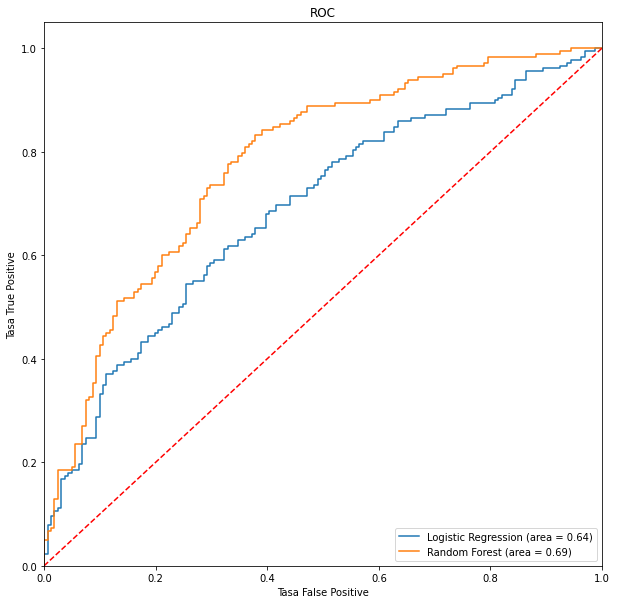

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, model_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model_logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(Y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, model_rf.predict_proba(X_test)[:,1])


plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa False Positive')
plt.ylabel('Tasa True Positive')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')

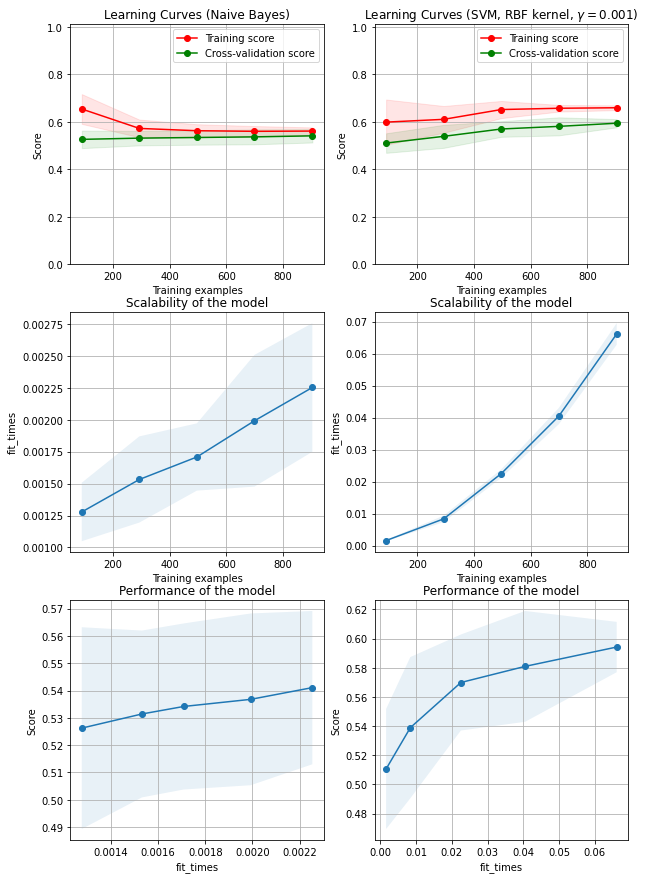

In [31]:
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.naive_bayes import GaussianNB

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X2, Y, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X2, Y, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()